<a href="https://colab.research.google.com/github/abrantesfg/TensorFlow_Projects/blob/main/Scikit_Learn_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Scikit-Learn

This notebook demonstrates some of the most useful functions of Scikite-Learn library

What we are going to cover:
    
0. An end-to-end Scikit-Learn Workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn Workflow

In [15]:
# 1. Get the data ready
import pandas as pd

!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

--2022-10-12 17:16:06--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart-disease.csv.1’

heart-disease.csv.1 100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-10-12 17:16:06 (49.7 MB/s) - ‘heart-disease.csv.1’ saved [11328/11328]



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [17]:
# 2. Choose the right model and hyperparamters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Wel'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
X_train.shape

(242, 13)

In [21]:
# Make a prediction "wrongly" -> np array in the wrong shape
#import numpy as np
#y_label = clf.predict(np.array([0,2,3,4]))

In [22]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [23]:
# 4. Evaluate the model
clf.score(X_train,y_train)

1.0

In [24]:
clf.score(X_test,y_test)

0.9180327868852459

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.88      0.97      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [26]:
confusion_matrix(y_test,y_preds)

array([[26,  4],
       [ 1, 30]])

In [27]:
accuracy_score(y_test,y_preds)

0.9180327868852459

In [28]:
# 5. Improve a model
# Try different amount of n_estimators
import numpy as np
np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 20 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 30 estimators...
Model accuracy on test set: 90.16%
 
Trying model with 40 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 50 estimators...
Model accuracy on test set: 90.16%
 
Trying model with 60 estimators...
Model accuracy on test set: 90.16%
 
Trying model with 70 estimators...
Model accuracy on test set: 90.16%
 
Trying model with 80 estimators...
Model accuracy on test set: 91.80%
 
Trying model with 90 estimators...
Model accuracy on test set: 91.80%
 


In [29]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [30]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.9180327868852459

In [31]:
# To remove warnings
import warnings
warnings.filterwarnings("ignore")

In [32]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.14 (default, Sep  8 2022, 00:06:44)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 21.1.3
   setuptools: 57.4.0
      sklearn: 1.0.2
        numpy: 1.21.6
        scipy: 1.7.3
       Cython: 0.29.32
       pandas: 1.3.5
   matplotlib: 3.2.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True


##1. Getting our data to be used with machine learning

Three main sthings we have to do:

 1. Split the data into featuers and labels (usually `X` & `y`)
 2. Filling (also called inputing) or disregarding missing values
 3. Cinverting non-numerical values to numerical values (also called feature encoding)

In [33]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [35]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [36]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

Let's use the car sales csv

In [38]:
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv
    
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

--2022-10-12 17:16:13--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26277 (26K) [text/plain]
Saving to: ‘car-sales-extended.csv’

car-sales-extended. 100%[===================>]  25.66K  --.-KB/s    in 0.001s  

2022-10-12 17:16:14 (22.2 MB/s) - ‘car-sales-extended.csv’ saved [26277/26277]



,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [39]:
len(car_sales)

1000

In [40]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [41]:
# Split the data
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Make all data numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [42]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [43]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [44]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [45]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether


In [47]:
# Import car sales missing data

!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv

car_sales_miss = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_miss

--2022-10-12 17:16:15--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30921 (30K) [text/plain]
Saving to: ‘car-sales-extended-missing-data.csv’

car-sales-extended- 100%[===================>]  30.20K  --.-KB/s    in 0.003s  

2022-10-12 17:16:16 (11.1 MB/s) - ‘car-sales-extended-missing-data.csv’ saved [30921/30921]



,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [48]:
car_sales_miss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# Create X and y
X = car_sales_miss.drop("Price",axis=1)
y = car_sales_miss["Price"]

In [50]:
# Let's try and convert our data into numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [51]:
car_sales_miss["Doors"].mean()


4.011578947368421

#### Option 1: Fill missing data with Pandas

In [52]:
# Fill the "Make" column
car_sales_miss["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_miss["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_miss["Odometer (KM)"].fillna(car_sales_miss["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_miss["Doors"].fillna(4, inplace=True)

In [53]:
car_sales_miss.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [54]:
# Remove rows with missing Price values
car_sales_miss.dropna(inplace=True)

In [55]:
car_sales_miss.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [56]:
len(car_sales_miss)

950

In [57]:
X = car_sales_miss.drop("Price",axis=1)
y = car_sales_miss["Price"]

In [58]:
# Let's try and convert our data into numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_miss)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing values with Scikit-Learn

In [59]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [60]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [61]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
# Split into X & y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [63]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [64]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [65]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [66]:
# Let's try and convert our data into numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [67]:
# Now we've got our data ad number and filled (no missing values), let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.21990196728583944

In [68]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
    
* sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classififer) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you are working on a machine learning problem and looking to use Sklearn and not sure what model youo should use, refer to the sklearn machine learning map

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a ML model for a regression problem

Let's use the California Housing dataset

In [69]:
# Get California dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [70]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [71]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [72]:
#housing_df.drop("MedHouseVal",axis=1)

In [73]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model on the training set
model = Ridge()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440126

#### What if Ridge didn't work? Let's try another algorithm

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is a combination of smaller models to try and make better predictions than just a single model)?



In [74]:
# Import the RandomForestRegresor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score
model.score(X_test,y_test)

0.8066196804802649

### 2.2 Choosing and estimator for a classification problem

In [75]:
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv
    
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

--2022-10-12 17:16:40--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart-disease.csv.2’

heart-disease.csv.2 100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-10-12 17:16:40 (75.3 MB/s) - ‘heart-disease.csv.2’ saved [11328/11328]



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [76]:
len(heart_disease)

303

In [77]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [78]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Linear SVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

# Evaluate
clf.score(X_test,y_test)

0.8688524590163934

In [79]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Linear SVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Evaluate
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:
    
    1. If you have structure data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model and use it to make predictions on our data

#### 3.1 Fit the model to the data

Different names for:
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [80]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Linear SVC
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
clf.fit(X_train,y_train)

# Evaluate
clf.score(X_test,y_test)

0.8524590163934426

### 3.1 Make predictions on a ML model

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [81]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [82]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
np.mean(y_preds == y_test)

0.8524590163934426

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.8524590163934426

In [85]:
# Returns the probabilities of a classification label
clf.predict_proba(X_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

`predict` can also be used for regression models

In [86]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit the mode
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [88]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [89]:
len(y_preds), len(y_test)

(4128, 4128)

In [90]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [91]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

With Scikit-Learn there are three ways to evaluate models/estimators:

1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score()` method

In [92]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
# Scoring on the training data
clf.score(X_train,y_train)

1.0

In [94]:
# Scoring on the testing data
# For classification problems it returns the mean accuracy
clf.score(X_test,y_test)

0.8524590163934426

Let's use the `score()` method on a regression problem...

In [95]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [96]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Create train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
clf.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
# Scoring on the testing data
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
clf.score(X_test,y_test)

0.8066196804802649

### 4.2 Evaluating a model using the `scoring` parameter

In [98]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [99]:
clf.score(X_test,y_test)

0.8524590163934426

In [100]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [101]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [102]:
# Scoring parameter set to None by default. If none, it uses the default parameter for the estimator (for classification = mean accuracy)
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)


In [104]:
np.mean(cross_val_score)

0.8248087431693989

In [105]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operator characteristic (ROC) curve**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate )fpr).

* True positive = model predicts 1 when truth is 1
* True negative = model predicts 0 when truth is 0
* False positive = model predicts 1 when truth is 0
* False negative = model predicts 0 when truth is 1

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]), 61)

In [108]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [109]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

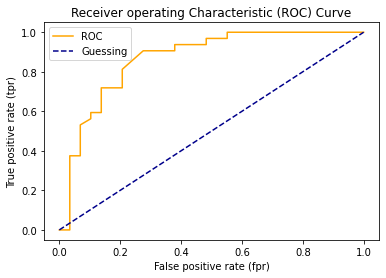

In [110]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr)
  and true positive rate (tpr) of a model.
  """
  # Plot roc curve
  plt.plot(fpr, tpr, color="orange", label="ROC")
  # Plot line with no predictive power (baseline)
  plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")

  # Customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Receiver operating Characteristic (ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [111]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

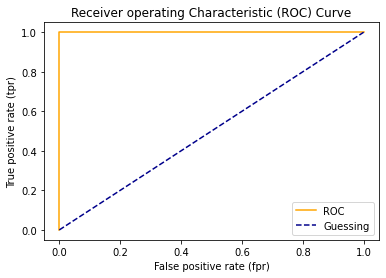

In [112]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [113]:
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [114]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [115]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [116]:
#import sys
#!conda install --yes --prefix (sys.prefix) seaborn

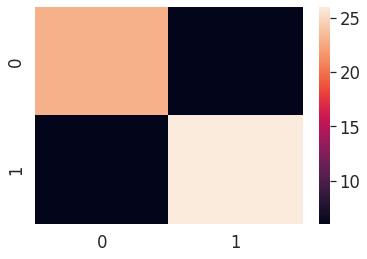

In [117]:
# Make our confusion matrix more visual
import seaborn as sns

# Set font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

#### Creating a confusion matrix using Scikit-Learn

In [118]:
import sklearn
sklearn.__version__



'1.0.2'

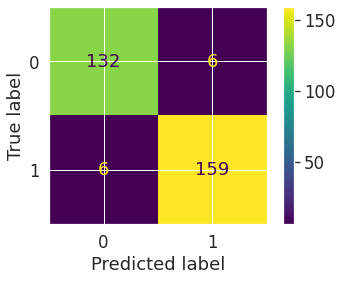

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

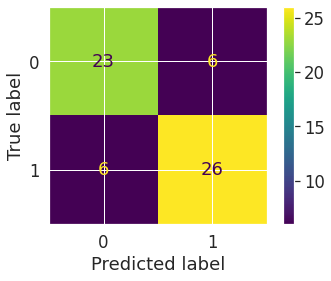

In [120]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification Report**

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [122]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarise classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become important when classes are imbalanced
* If false positive predictions are worse than false negatives, aim for high precision
* If false negative predictions are worse than false positives, aim for high recall
* **F1-score** is a combination of precision and recall


### 4.2.2 Regression model evaluation metrics

The ones we are going to cover are:

1. R^2 (r-quared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)


**$R^2$**

Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all you model does is predict the mean of the targets, it's $R^2$ value would be 0. And if your model perfectly predicts a range of numbers, it's $R^2$ value would be 1.

In [123]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [124]:
model.score(X_test,y_test)

0.8066196804802649

In [125]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [126]:
y_test.mean()

2.0550030959302323

In [127]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [128]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [129]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

In [130]:
y_pred = model.predict(X_test)

In [131]:
r2_score(y_true=y_test,
         y_pred=y_pred)

0.8066196804802649

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [132]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_pred)
mae

0.3265721842781009

In [133]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values":y_pred})
df["differences"] = abs(df["actual values"] - df["predicted values"])
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,0.448240


In [134]:
df["differences"].mean()

0.3265721842781009

**Mean squared error (MSE)**

MSE is the mean of the square of the erros between the actual and predicted values. Ampltifies values that are large! (MAE keeps everything in the same scale)

In [135]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse

0.2534073069137548

In [136]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [137]:
squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [138]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [139]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25728320720794084

In [140]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [141]:
df_large_error["squared_differences"].mean()

0.7333540351264799

To summarise:

* **$R^2$** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 is to 1, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* **MAE** gives a better indication of how far off each of your model's predictions are on average.
* As for **MAE** and **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's saywe're predicting the values of houses
  * Pay more attention to MAE: When being 10,000 off is twice as bad as being 5,000 off
  * Pay more attention to MSE: When being 10,000 off is more than twice as bad as being 5,000 off


### 4.2.3 Finally using the `scoring` parameter

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

In [143]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) #default scoring evalutation metric is used
cv_acc
print(f"The cross-validated accuracy is {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is 82.48%


In [144]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is 82.48%


In [145]:
# Precision
np.random.seed(42)

# Cross-validation precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is {np.mean(cv_precision) * 100:.2f}%")

The cross-validated precision is 83.30%


In [146]:
# Recall
np.random.seed(42)

# Cross-validation recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is {np.mean(cv_recall) * 100:.2f}%")

The cross-validated recall is 85.45%


In [147]:
# F1
np.random.seed(42)

# Cross-validation F1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 is {np.mean(cv_f1) * 100:.2f}%")

The cross-validated F1 is 84.27%


Using now a regression problem...

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestRegressor(n_estimators=100)

In [149]:
np.random.seed(42)

# Cross-validation r2
cv_r2 = cross_val_score(clf, X, y, cv=3, scoring=None) #default scoring evalutation metric is used
cv_r2
print(f"The cross-validated R2 is {np.mean(cv_r2) * 100:.2f}%")

The cross-validated R2 is 65.46%


In [150]:
np.random.seed(42)

# Cross-validation r2
cv_mae = cross_val_score(clf, X, y, cv=3, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE is {np.mean(cv_mae) * 100:.2f}%")

The cross-validated MAE is -48.35%


In [151]:
np.random.seed(42)

# Cross-validation r2
cv_mse = cross_val_score(clf, X, y, cv=3, scoring="neg_mean_squared_error")
print(f"The cross-validated MSE is {np.mean(cv_mse) * 100:.2f}%")

The cross-validated MSE is -46.14%


### 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn ML models/estimators is to using the `sklearn.metrics` module

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test,clf.predict(X_test))*100:.2f}%")
print(f"Precision: {precision_score(y_test,clf.predict(X_test))}")
print(f"Recall: {recall_score(y_test,clf.predict(X_test))}")
print(f"F1: {f1_score(y_test,clf.predict(X_test))}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [153]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

print("Classifier metrics on the test set:")
print(f"R2: {r2_score(y_test,clf.predict(X_test))}")
print(f"MAE: {mean_absolute_error(y_test,clf.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test,clf.predict(X_test))}")


Classifier metrics on the test set:
R2: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we can use?
* Could we improve the current model?

**Parameters vs. Hyperparameters**

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (pottentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustly with GridSearchCV

In [154]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning hyperparameters by hand

Let's make 3 sets (training, validation and test)

We are going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [155]:
def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
  """

  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  metric_dict = {"accuracy": round(accuracy,2),
                 "precision":round(precision,2),
                 "recall": round(recall,2),
                 "f1": round(f1,2)}
  print(f"Acc: {accuracy * 100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1: {f1:.2f}")

  return metric_dict



In [156]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

#len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [157]:
np.random.seed(42)

# Create a second classifier with different hyperparamters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier on validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [158]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [159]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [160]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [161]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [162]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [163]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [164]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [165]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


Let's compare our different models metrics

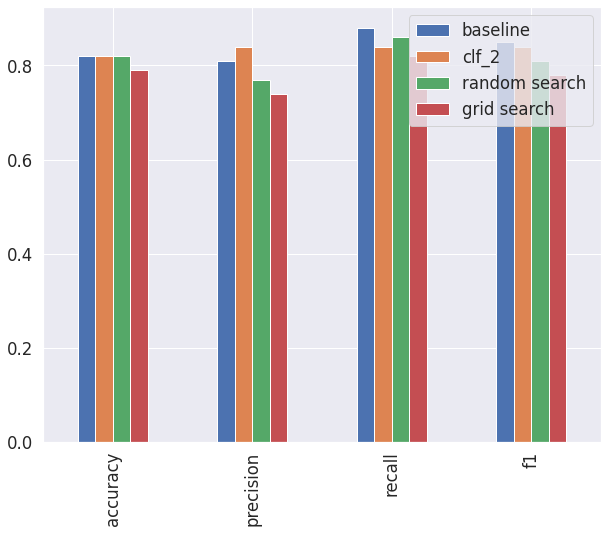

In [166]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2":clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained machine learning models

Two ways to sabe and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [167]:
import pickle

# Save an existing model to a file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl","wb"))
 

In [168]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [169]:
# Make predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [170]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_random_forest_model_1.joblib")

['gs_random_random_forest_model_1.joblib']

In [171]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_random_forest_model_1.joblib")
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## Using Pipeline



In [172]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [173]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [174]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do:

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [175]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
     ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
     ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numerical_features = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[
     ("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                transformers=[
                    ("cat",categorical_transformer,categorical_features),
                    ("door",door_transformer,door_feature),
                    ("num",numerical_transformer,numerical_features)])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model",RandomForestRegressor())])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [176]:
# Use GridSeachCV with our regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean","median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         